In [27]:
import pickle
import math
import random
import numpy as np
import matplotlib.pyplot as plt

# Fig 2

In [33]:
N = 4                             # No. of agents
T = 10
alpha = 0.5                       # Exponent
ENS_step = 1000                    # Ensemble
MC_step = 100+1                     # (Macro) Step

spin_config = ['NH', 'EWH', 'SH']

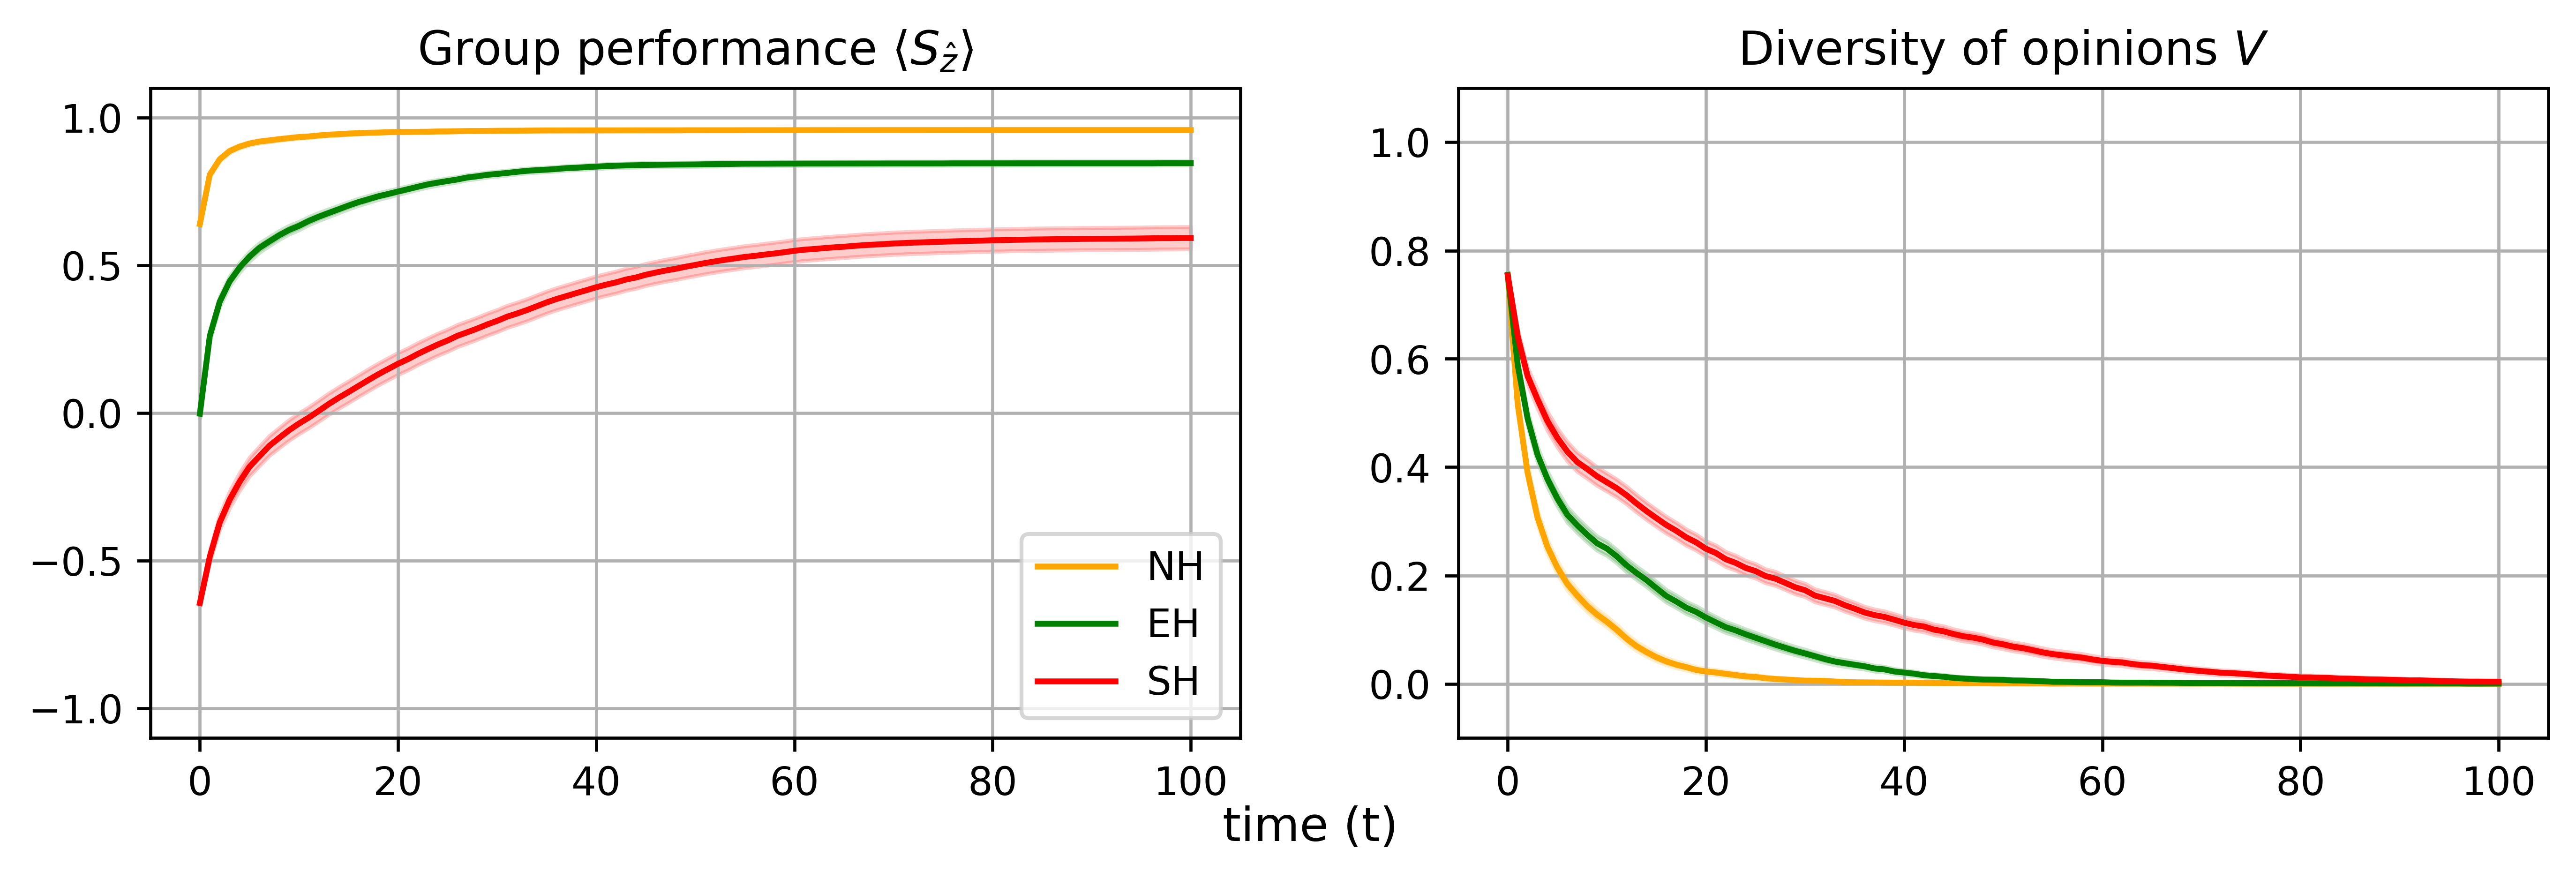

In [34]:
fig,axs = plt.subplots(1,2,figsize=(11,3), dpi=600)

t = np.arange(0, MC_step)

axs[0].set_ylim([-1.1,1.1])
axs[1].set_ylim([-0.1,1.1])

col = ['orange', 'green', 'red']

# N=3
S_array = []
V_array = []

for idx, config in enumerate(spin_config):
  with open(f"Sarray_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
    S_array.append(pickle.load(f))
  with open(f"Varray_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
    V_array.append(pickle.load(f))

axs[0].set_title(r'Group performance $\left\langle S_\hat{z} \right\rangle$')
for i, config in enumerate(spin_config):
  Savg = np.array([S_array[i][mc, :, :,2].mean(1).mean() for mc in range(MC_step)])
  Sstd = np.array([2*np.std(S_array[i][mc, :, :,2].mean(1))/(ENS_step**0.5) for mc in range(MC_step)])
  if config == 'EWH': config = 'E/WH'
  axs[0].plot(t, Savg, '-', color=col[i])
  axs[0].fill_between(t, Savg - Sstd, Savg + Sstd, color=col[i], alpha = 0.2)

axs[0].grid()

axs[1].set_title(r'Diversity of opinions $V$')
for i, config in enumerate(spin_config):
  Vavg = np.array([V_array[i][mc,:].mean() for mc in range(MC_step)])
  Vstd = np.array([2*np.std(V_array[i][mc,:])/(ENS_step**0.5) for mc in range(MC_step)])
  axs[1].plot(t, Vavg, '-', color=col[i])
  axs[1].fill_between(t, Vavg - Vstd, Vavg + Vstd, color=col[i], alpha = 0.2)
axs[1].grid()

axs[0].plot(1,1,color='orange', label='NH')
axs[0].plot(1,1,color='green', label='EH')
axs[0].plot(1,1,color='red', label='SH')
axs[0].legend()

fig.suptitle("time (t)", y = 0.03)
plt.savefig('Fig2.png', bbox_inches = 'tight')

# Fig 3

In [35]:
N = 4                             # No. of agents
T = 10
ENS_step = 1000                    # Ensemble
MC_step = 100+1                     # (Macro) Step

spin_config = ['SH']

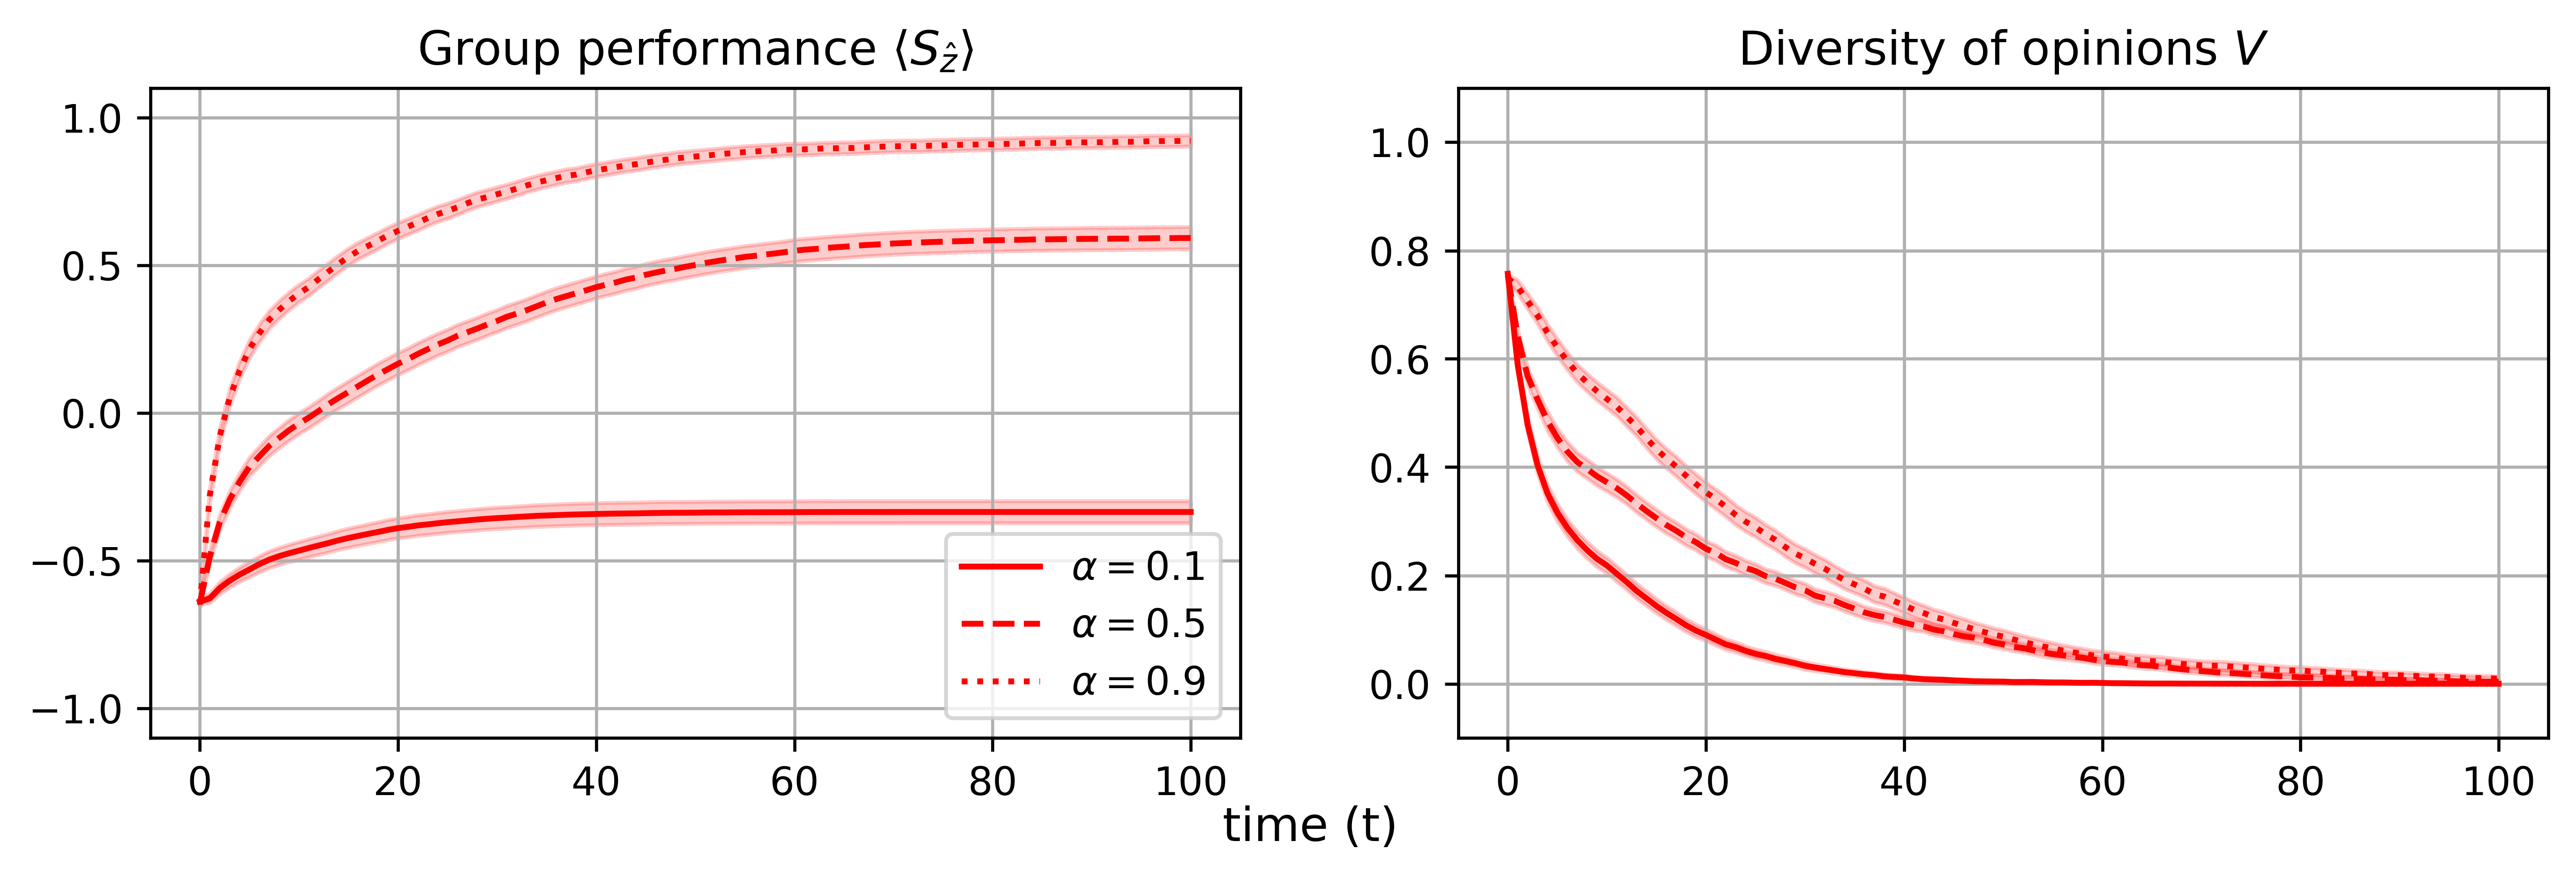

In [36]:
fig,axs = plt.subplots(1,2,figsize=(11,3), dpi=600)

t = np.arange(0, MC_step)

axs[0].set_ylim([-1.1,1.1])
axs[1].set_ylim([-0.1,1.1])

# N=3
line = ['-', '--', ':']
col = ['red']

for idx, alpha in enumerate([0.1,0.5,0.9]):
    S_array = []
    V_array = []

    for config in spin_config:
      with open(f"Sarray_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
        S_array.append(pickle.load(f))
      with open(f"Varray_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
        V_array.append(pickle.load(f))

    axs[0].set_title(r'Group performance $\left\langle S_\hat{z} \right\rangle$')
    for i, config in enumerate(spin_config):
      Savg = np.array([S_array[i][mc, :, :,2].mean(1).mean() for mc in range(MC_step)])
      Sstd = np.array([2*np.std(S_array[i][mc, :, :,2].mean(1))/(ENS_step**0.5) for mc in range(MC_step)])
      axs[0].plot(t, Savg, color=col[i], linestyle=line[idx])
      axs[0].fill_between(t, Savg - Sstd, Savg + Sstd, color=col[i], alpha = 0.2)
    axs[0].grid()

    axs[1].set_title(r'Diversity of opinions $V$')
    for i, config in enumerate(spin_config):
      Vavg = np.array([V_array[i][mc,:].mean() for mc in range(MC_step)])
      Vstd = np.array([2*np.std(V_array[i][mc,:])/(ENS_step**0.5) for mc in range(MC_step)])
      axs[1].plot(t, Vavg, color=col[i], linestyle=line[idx])
      axs[1].fill_between(t, Vavg - Vstd, Vavg + Vstd, color=col[i], alpha = 0.2)
    axs[1].grid()

axs[0].plot(1,1,color='red', linestyle='-', label=r'$\alpha=0.1$')
axs[0].plot(1,1,color='red', linestyle='--', label=r'$\alpha=0.5$')
axs[0].plot(1,1,color='red', linestyle=':', label=r'$\alpha=0.9$')
axs[0].legend()
    
    
fig.suptitle("time (t)", y = 0.03)
plt.savefig('Fig3.png', bbox_inches = 'tight')

# Fig 4_1

In [37]:
N = 4                             # No. of agents
alpha = 0.5                       # Exponent
ENS_step = 1000                    # Ensemble
MC_step = 100+1                     # (Macro) Step

spin_config = ['SH']

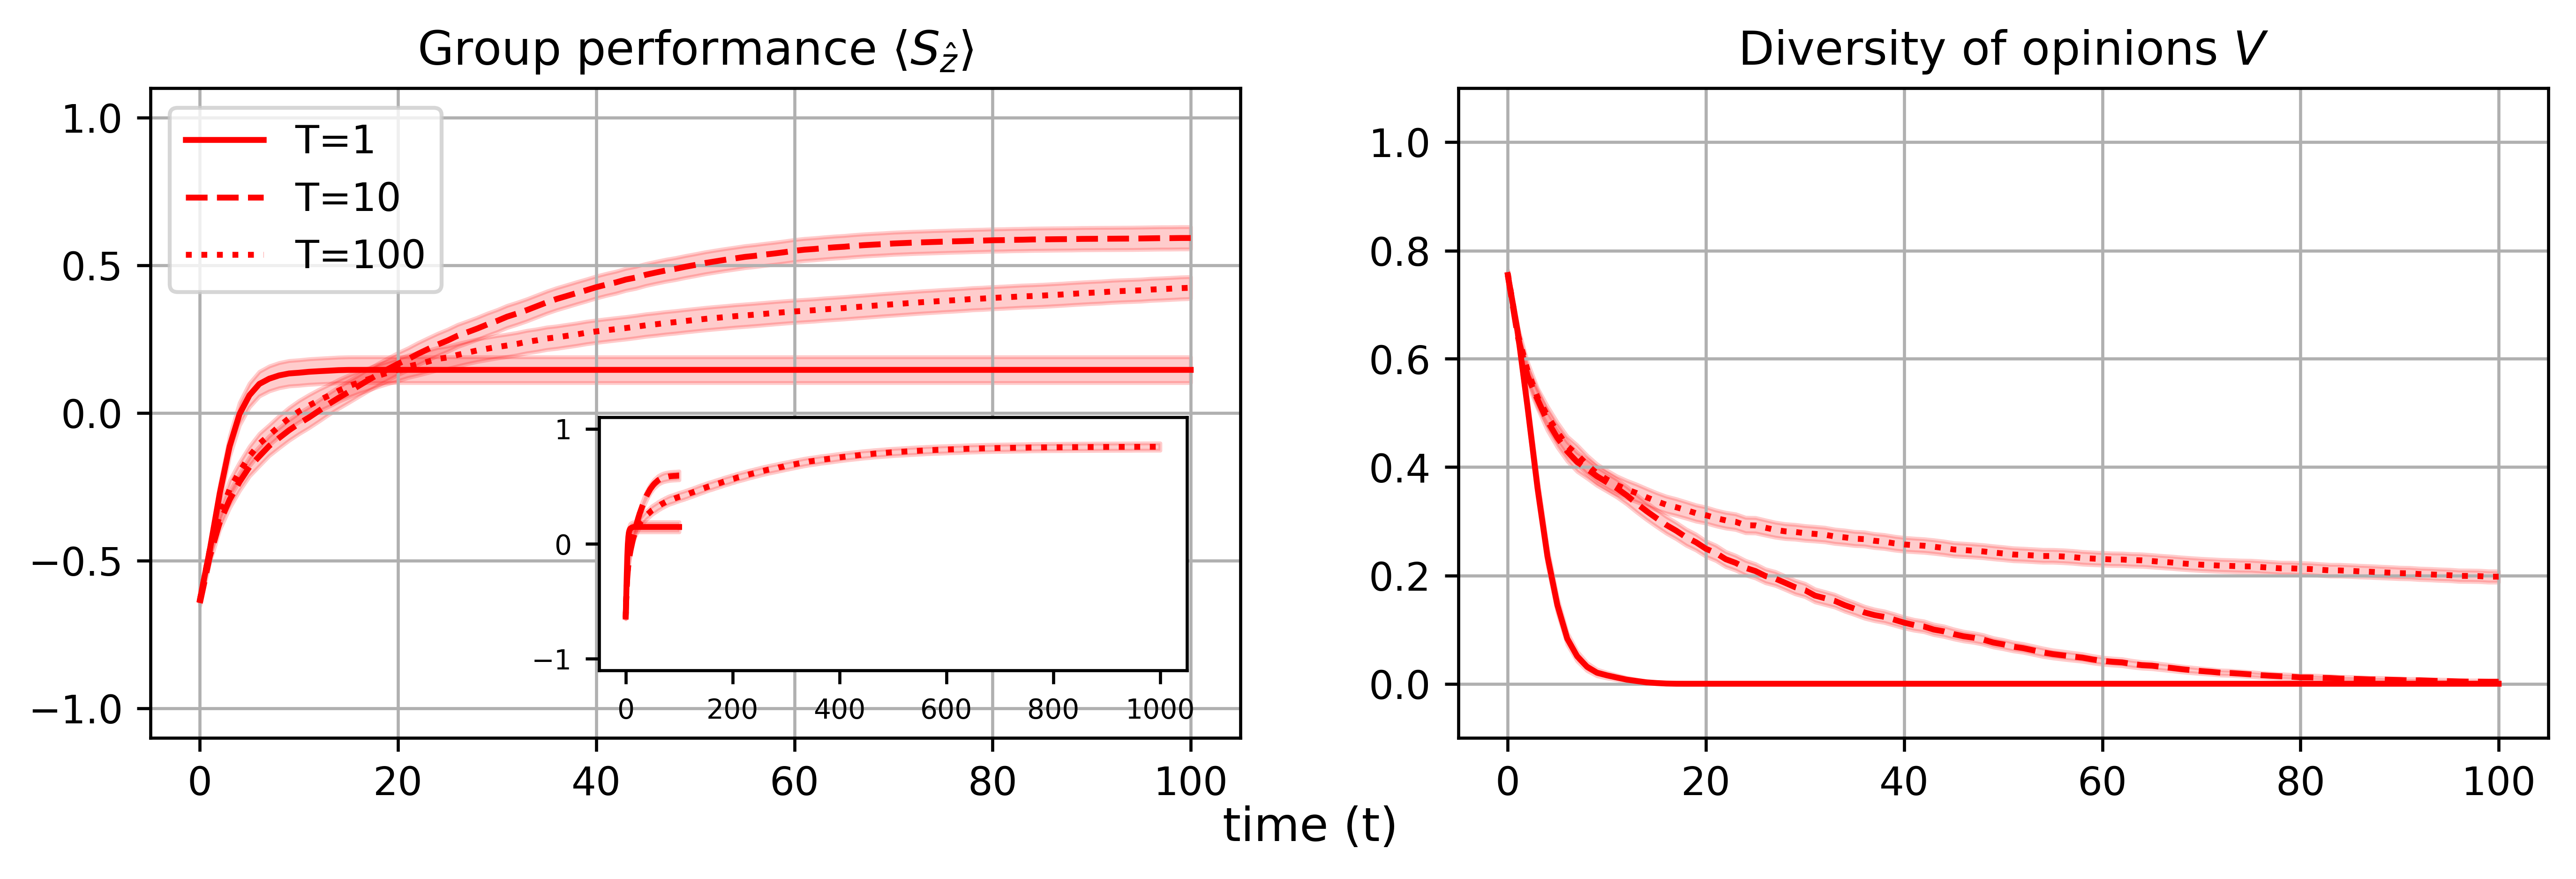

In [39]:
fig,axs = plt.subplots(1,2,figsize=(11,3), dpi=600)

t = np.arange(0, MC_step)

axs[0].set_ylim([-1.1,1.1])
axs[1].set_ylim([-0.1,1.1])

# N=3
line = ['-', '--', ':']
col = ['red']

for idx, T in enumerate([1,10,100]):
    S_array = []
    V_array = []

    for config in spin_config:
      with open(f"Sarray_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
        S_array.append(pickle.load(f))
      with open(f"Varray_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
        V_array.append(pickle.load(f))

    axs[0].set_title(r'Group performance $\left\langle S_\hat{z} \right\rangle$')
    for i, config in enumerate(spin_config):
      Savg = np.array([S_array[i][mc, :, :,2].mean(1).mean() for mc in range(MC_step)])
      Sstd = np.array([2*np.std(S_array[i][mc, :, :,2].mean(1))/(ENS_step**0.5) for mc in range(MC_step)])
      axs[0].plot(t, Savg, color=col[i], linestyle=line[idx])
      axs[0].fill_between(t, Savg - Sstd, Savg + Sstd, color=col[i], alpha = 0.2)
    axs[0].grid()

    axs[1].set_title(r'Diversity of opinions $V$')
    for i, config in enumerate(spin_config):
      Vavg = np.array([V_array[i][mc,:].mean() for mc in range(MC_step)])
      Vstd = np.array([2*np.std(V_array[i][mc,:])/(ENS_step**0.5) for mc in range(MC_step)])
      axs[1].plot(t, Vavg, color=col[i], linestyle=line[idx])
      axs[1].fill_between(t, Vavg - Vstd, Vavg + Vstd, color=col[i], alpha = 0.2)
    axs[1].grid()
    
    
# 첫 번째 서브플롯에 인셋 플롯 추가
inset_ax = fig.add_axes([0.27, 0.19, 0.19, 0.3])  # [left, bottom, width, height]
for idx, T in enumerate([1,10]):
    S_array = []
    V_array = []
    
    for config in spin_config:
      with open(f"Sarray_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
        S_array.append(pickle.load(f))
      with open(f"Varray_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
        V_array.append(pickle.load(f))
    for i, config in enumerate(spin_config):
          Savg = np.array([S_array[i][mc, :, :,2].mean(1).mean() for mc in range(MC_step)])
          Sstd = np.array([2*np.std(S_array[i][mc, :, :,2].mean(1))/(ENS_step**0.5) for mc in range(MC_step)])
          inset_ax.plot(t, Savg, color=col[i], linestyle=line[idx])
          inset_ax.fill_between(t, Savg - Sstd, Savg + Sstd, color=col[i], alpha = 0.2)
t_ex = np.arange(0, 1000+1)
for i, config in enumerate(spin_config):
    S_array = []
    with open(f"Sarray_N{N}_T1001000_alpha{alpha}_{config}.pkl","rb") as f:
        S_array.append(pickle.load(f))
    Savg = np.array([S_array[i][mc, :, :,2].mean(1).mean() for mc in range(1001)])
    Sstd = np.array([2*np.std(S_array[i][mc, :, :,2].mean(1))/(ENS_step**0.5) for mc in range(1001)])
    inset_ax.plot(t_ex, Savg, color=col[i], linestyle=':')
    inset_ax.fill_between(t_ex, Savg - Sstd, Savg + Sstd, color=col[i], alpha = 0.2)
inset_ax.set_ylim([-1.1,1.1])
inset_ax.tick_params(axis='both', which='major', labelsize=7)

    
axs[0].plot(1,1,color='red', linestyle='-', label='T=1')
axs[0].plot(1,1,color='red', linestyle='--', label='T=10')
axs[0].plot(1,1,color='red', linestyle=':', label='T=100')
axs[0].legend(loc='upper left')
    
fig.suptitle("time (t)", y = 0.03)
plt.savefig('Fig4_1.png', bbox_inches = 'tight')

# Fig 4_2

In [72]:
N = 4                             # No. of agents
alpha = 0.5
T = 10
ENS_step = 1000                    # Ensemble
MC_step = 100+1                     # (Macro) Step

T_lst = [1,5,10,15,20,25,30]

In [73]:
SH_avg = []; SH_std = []
SHV_avg = []; SHV_std = []
config = 'SH'
for T in T_lst:
  with open(f"Sarray_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
    lst = pickle.load(f)
  SH_avg.append(lst[-1, :, :,2].mean(1).mean())
  SH_std.append(2*np.std(lst[-1, :, :,2].mean(1))/(ENS_step**0.5))

  with open(f"Varray_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
    lst = pickle.load(f)
  SHV_avg.append(lst[-1, :].mean())
  SHV_std.append(2*np.std(lst[-1, :])/(ENS_step**0.5))

In [74]:
SH_avg = np.array(SH_avg)
SH_std = np.array(SH_std)

SHV_avg = np.array(SHV_avg)
SHV_std = np.array(SHV_std)

In [75]:
SH_avg

array([0.14609971, 0.34143819, 0.60781698, 0.66532033, 0.68644437,
       0.60693794, 0.61508545])

In [76]:
SHV_avg

array([0.        , 0.        , 0.0031648 , 0.03099821, 0.06814822,
       0.09526732, 0.12716261])

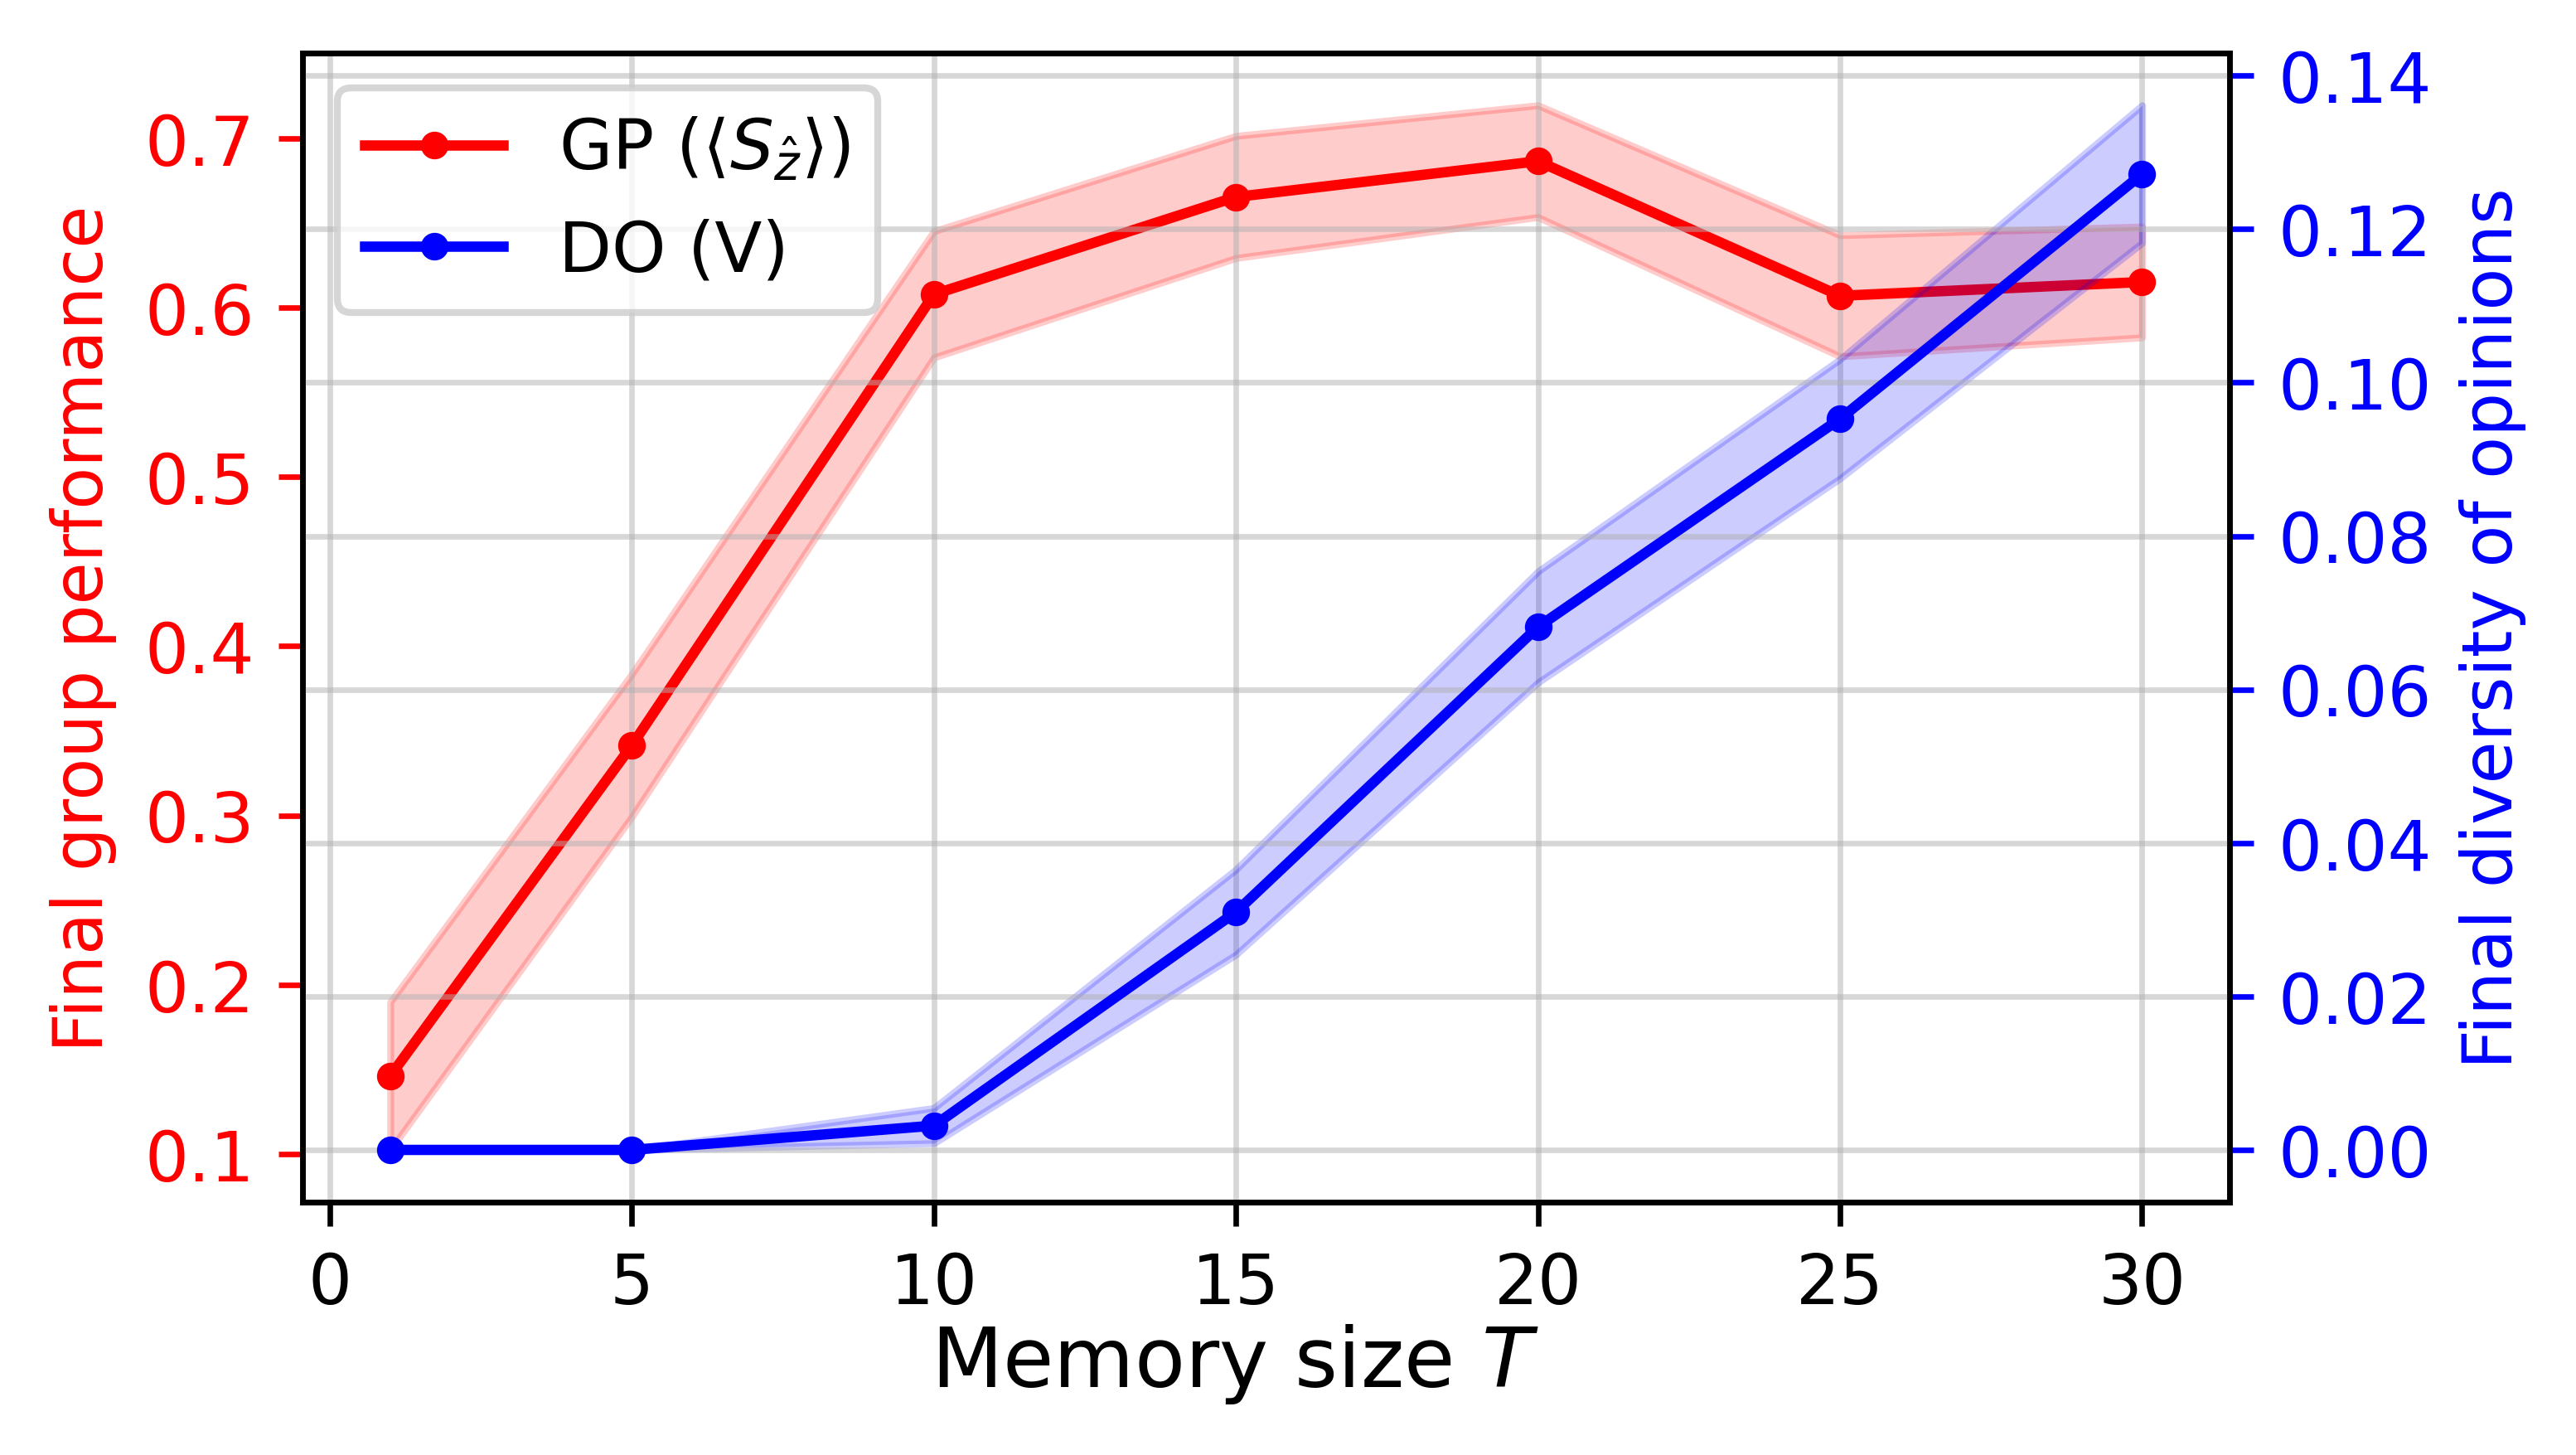

In [77]:
fig, ax1 = plt.subplots(figsize=(5,3), dpi=600)

line1 = ax1.plot(T_lst, SH_avg, marker='.', color='red', label=r'GP ($\left\langle S_\hat{z} \right\rangle$)')
ax1.fill_between(T_lst, SH_avg - SH_std, SH_avg + SH_std, color='red', alpha = 0.2)
ax1.set_ylabel('Final group performance', color='red')
ax1.tick_params(axis="y", colors="red")

ax2 = ax1.twinx()


line2 = ax2.plot(T_lst, SHV_avg, marker='.', color='blue', label=r'DO (V)')
ax2.fill_between(T_lst, SHV_avg - SHV_std, SHV_avg + SHV_std, color='blue', alpha = 0.2)
ax2.set_ylabel(r'Final diversity of opinions', color='blue')
ax2.tick_params(axis="y", colors="blue")

ax1.grid(True, axis='x', alpha=0.5)
ax2.grid(alpha=0.5)

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax2.legend(lines, labels, loc='upper left')

fig.suptitle("Memory size $T$", y = 0.03)
plt.savefig('Fig4_2.png', bbox_inches = 'tight')

# Fig5

In [49]:
N = 4                             # No. of agents
alpha = 0.5
ENS_step = 1000                    # Ensemble
MC_step = 100+1                     # (Macro) Step

T_lst = [1,10,20,50,100,200]

In [50]:
V_matrix = []
V_std_matrix=[]
config = 'SH'
for T in [1,10,20,50,100,200]:
    if T == 1: T_mark = [int(T*idx) for idx in np.linspace(0,10,11)]
    else: T_mark = [int(T*idx) for idx in np.linspace(0,10,21)]
    with open(f"Varray_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
        V = pickle.load(f)
    V_matrix.append([V[t,:].mean() for t in T_mark])
    V_std_matrix.append([np.std(V[t,:])/(ENS_step**0.5) for t in T_mark])

In [51]:
S_matrix = []
S_std_matrix=[]
config = 'SH'
for T in [1,10,20,50,100,200]:
    if T == 1: T_mark = [int(T*idx) for idx in np.linspace(0,10,11)]
    else: T_mark = [int(T*idx) for idx in np.linspace(0,10,21)]
    with open(f"Sarray_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
        S = pickle.load(f)
    S_lst = [S[t, :, :,2].mean() for t in T_mark]
    S_max = max(S_lst)
    S_min = min(S_lst)
    S_matrix.append(([(S[t, :, :,2].mean()-S_min)/(S_max-S_min) for t in T_mark]))
    S_std_matrix.append([np.std(S[t, :, :,2])/(ENS_step**0.5)/(S_max-S_min) for t in T_mark])

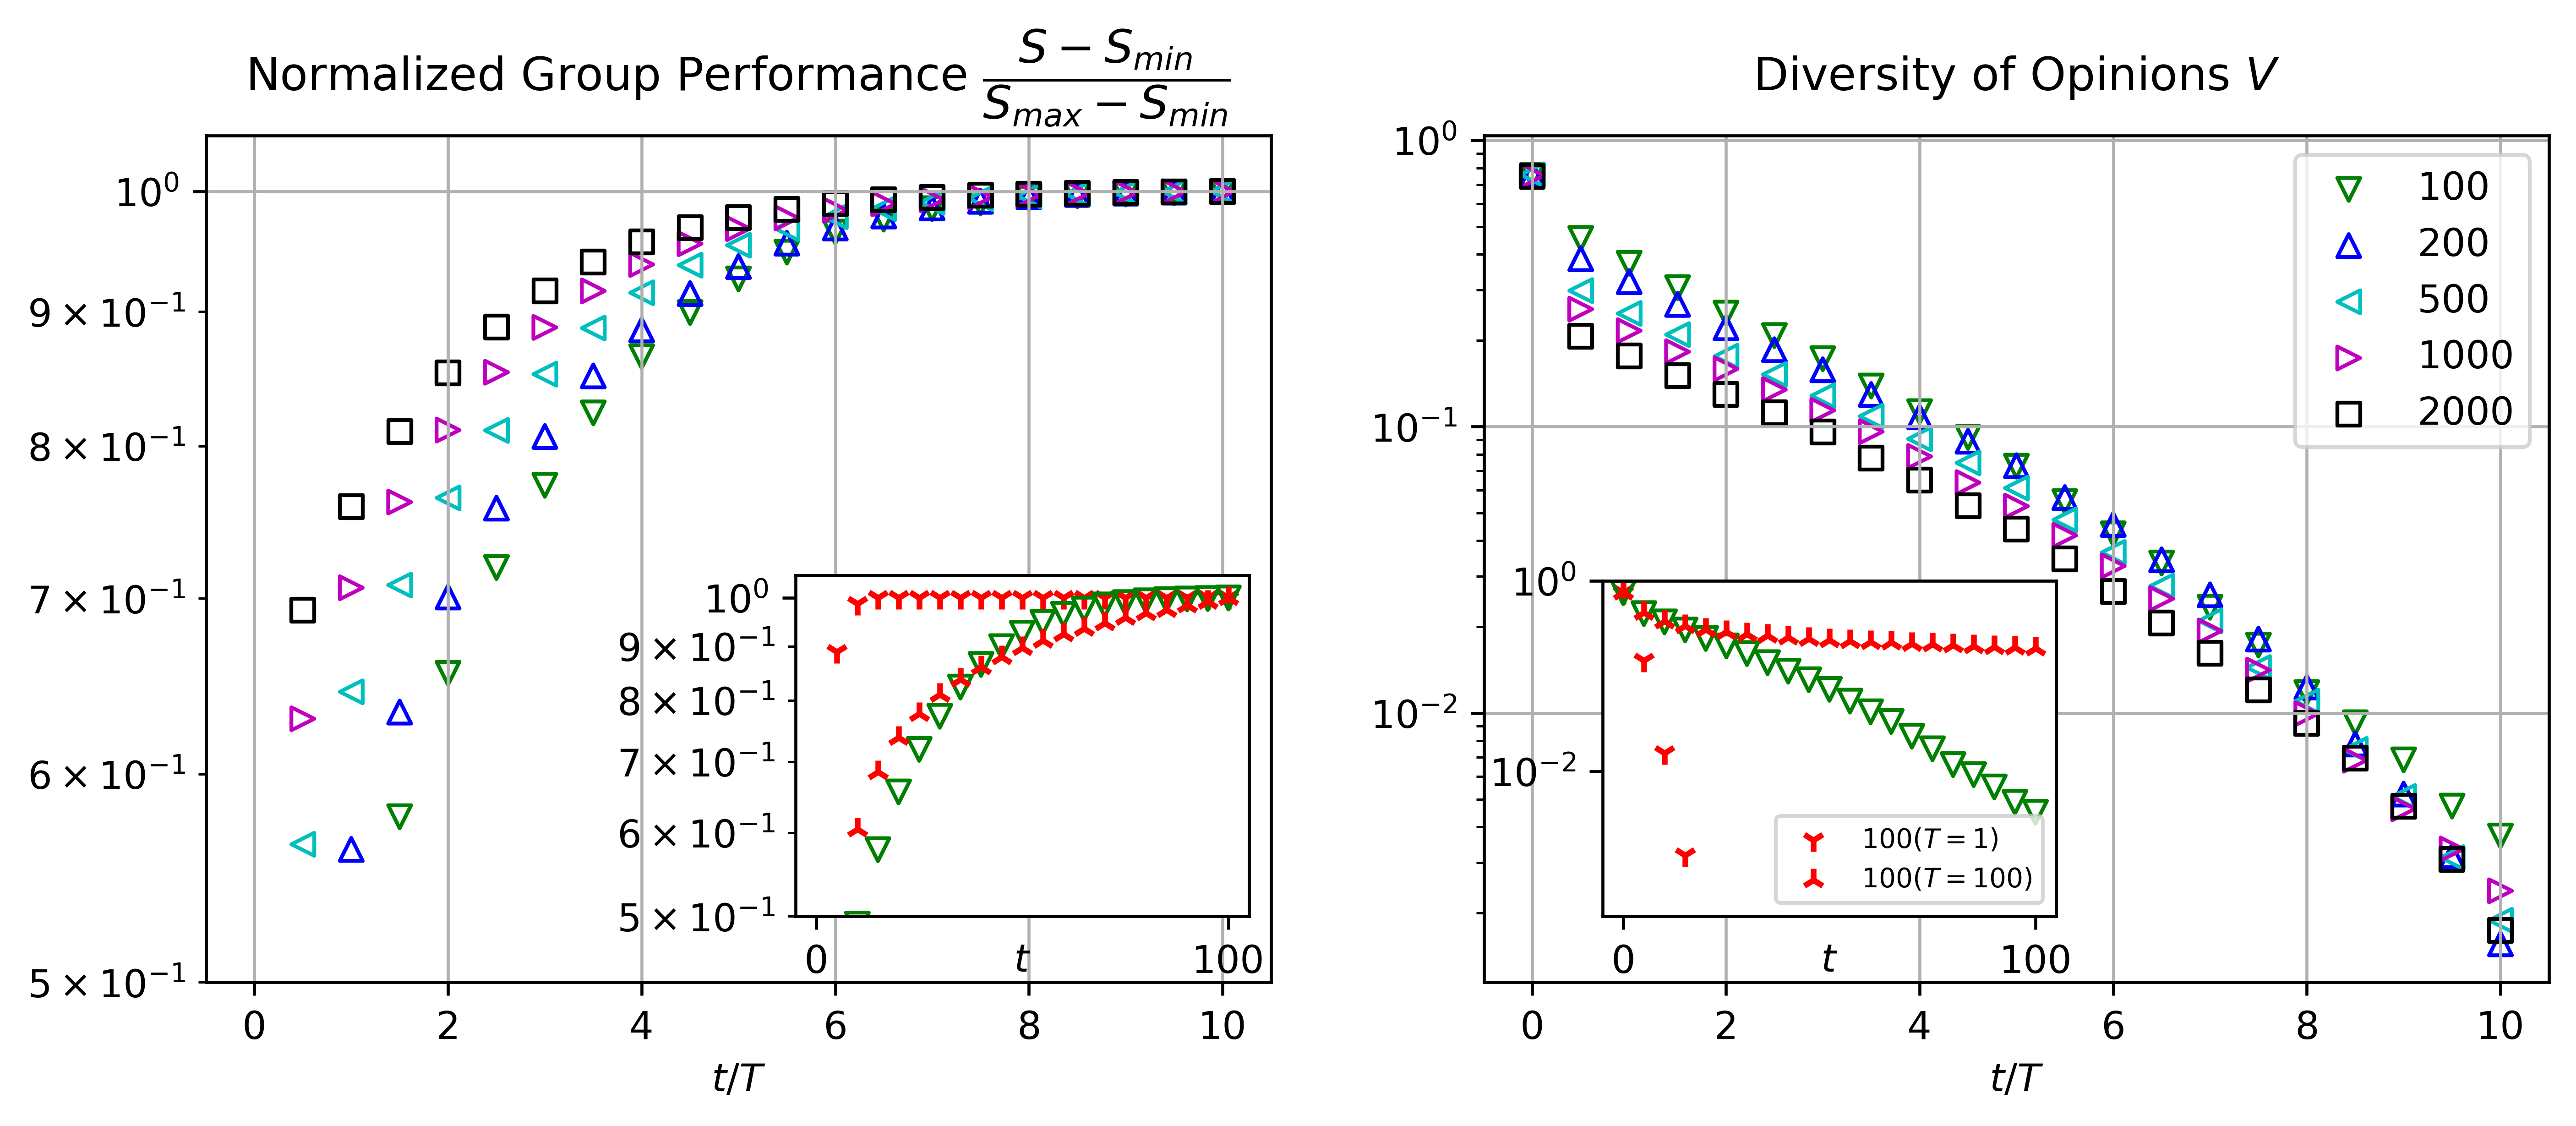

In [138]:
fig,axs = plt.subplots(1,2,figsize=(11,4), dpi=600)
t = np.linspace(0,10,21)

# main_fig 2
axs[0].set_title(r'Normalized Group Performance $\dfrac{S-S_{min}}{S_{max}-S_{min}}$', pad=12)
axs[0].scatter(t, S_matrix[0], marker='v', facecolors='none', edgecolors='g', label=r'$T=10$')
axs[0].scatter(t, S_matrix[1], marker='^', facecolors='none', edgecolors='b', label=r'$T=20$')
axs[0].scatter(t, S_matrix[2], marker='<', facecolors='none', edgecolors='c', label=r'$T=50$')
axs[0].scatter(t, S_matrix[3], marker='>', facecolors='none', edgecolors='m', label=r'$T=100$')
axs[0].scatter(t, S_matrix[4], marker='s', facecolors='none', edgecolors='k', label=r'$T=200$')
axs[0].set_xlim([-0.5,10.5])
axs[0].set_ylim([0.5,1.05])
axs[0].set_yticks([0.5, 1], labels=[0.5,1])
axs[0].set_xlabel(r"$t/T$")
#axs[0].set_ylabel(r'$\dfrac{S-S_{min}}{S_{max}-S_{min}}$', labelpad=-15, rotation=0)
axs[0].set_yscale('log')
axs[0].grid()

inset_ax = fig.add_axes([0.32, 0.17, 0.15, 0.31])
inset_ax.scatter(t, S_matrix[5], marker='1', facecolors='none', facecolor='red', label=r'$100 (T=1)$')
inset_ax.scatter(t, S_matrix[0], marker='v', facecolors='none', edgecolors='g', label=r'$100 (T=10)$')
inset_ax.scatter(t, S_matrix[6], marker='2', facecolors='none', facecolor='red', label=r'$100 (T=100)$')
inset_ax.tick_params(axis='both')
inset_ax.set_xlim([-0.5,10.5])
inset_ax.set_ylim([0.5,1.05])
inset_ax.set_xticks([0.0, 10.0], labels=[0,100])
inset_ax.set_xlabel(r"$t$", labelpad=-10)
inset_ax.set_yscale('log')

# main_fig 2
axs[1].set_title(r'Diversity of Opinions $V$', pad=12)
axs[1].scatter(t, V_matrix[0], marker='v', facecolors='none', edgecolors='g', label=r'$T=10$')
axs[1].scatter(t, V_matrix[1], marker='^', facecolors='none', edgecolors='b', label=r'$T=20$')
axs[1].scatter(t, V_matrix[2], marker='<', facecolors='none', edgecolors='c', label=r'$T=50$')
axs[1].scatter(t, V_matrix[3], marker='>', facecolors='none', edgecolors='m', label=r'$T=100$')
axs[1].scatter(t, V_matrix[4], marker='s', facecolors='none', edgecolors='k', label=r'$T=200$')
axs[1].legend()
axs[1].set_xlim([-0.5,10.5])
axs[1].set_xlabel(r"$t/T$")
#axs[1].set_ylabel(r'$V$', rotation=0)
axs[1].set_yscale('log')
axs[1].grid()

inset_ax = fig.add_axes([0.587, 0.17, 0.15, 0.305])
inset_ax.scatter(t, V_matrix[5], marker='1', facecolors='none', facecolor='red', label=r'$100 (T=1)$')
inset_ax.scatter(t, V_matrix[0], marker='v', facecolors='none', edgecolors='g')
inset_ax.scatter(t, V_matrix[6], marker='2', facecolors='none', facecolor='red', label=r'$100 (T=100)$')
inset_ax.tick_params(axis='both')
inset_ax.legend(loc='lower right', fontsize=7)
inset_ax.set_xlim([-0.5,10.5])
inset_ax.set_ylim([0.0003,1])
inset_ax.set_xticks([0.0, 10.0], labels=[0,100])
inset_ax.set_xlabel(r"$t$", labelpad=-10)
inset_ax.set_yscale('log')

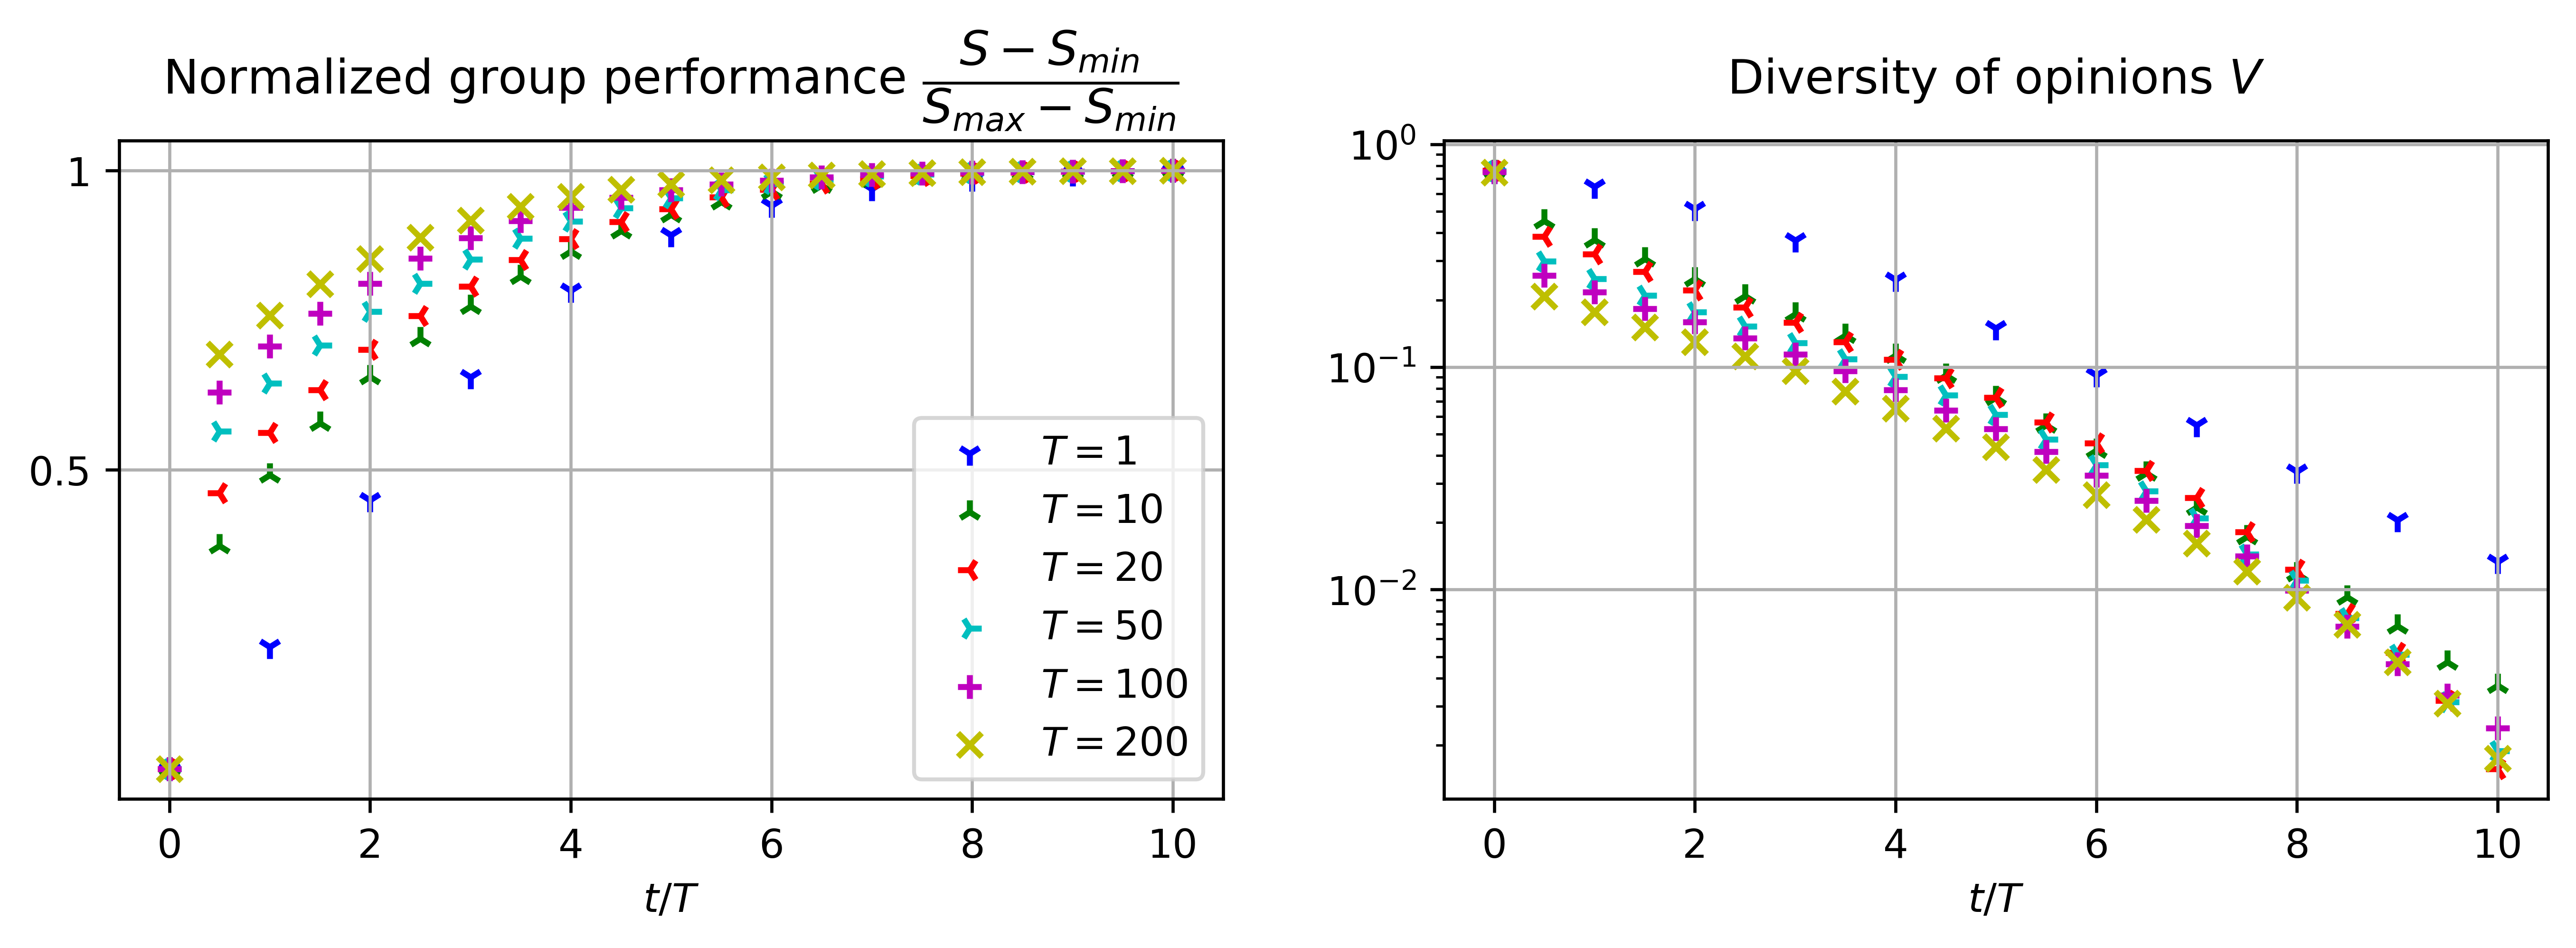

In [52]:
fig,axs = plt.subplots(1,2,figsize=(11,3), dpi=600)
t0 = np.linspace(0,10,11)
t = np.linspace(0,10,21)

# main_fig 2
axs[0].set_title(r'Normalized group performance $\dfrac{S-S_{min}}{S_{max}-S_{min}}$', pad=12)
axs[0].scatter(t0, S_matrix[0], marker='1', facecolors='b', label=r'$T=1$')
axs[0].scatter(t, S_matrix[1], marker='2', facecolors='g', label=r'$T=10$')
axs[0].scatter(t, S_matrix[2], marker='3', facecolors='r', label=r'$T=20$')
axs[0].scatter(t, S_matrix[3], marker='4', facecolors='c', label=r'$T=50$')
axs[0].scatter(t, S_matrix[4], marker='+', facecolors='m', label=r'$T=100$')
axs[0].scatter(t, S_matrix[5], marker='x', facecolors='y', label=r'$T=200$')
axs[0].set_xlim([-0.5,10.5])
axs[0].set_yticks([0.5, 1], labels=[0.5,1])
axs[0].set_xlabel(r"$t/T$")
axs[0].legend()
axs[0].grid()

# main_fig 2
axs[1].set_title(r'Diversity of opinions $V$', pad=12)
axs[1].scatter(t0, V_matrix[0], marker='1', facecolors='b', label=r'$T=1$')
axs[1].scatter(t, V_matrix[1], marker='2', facecolors='g', label=r'$T=10$')
axs[1].scatter(t, V_matrix[2], marker='3', facecolors='r', label=r'$T=20$')
axs[1].scatter(t, V_matrix[3], marker='4', facecolors='c', label=r'$T=50$')
axs[1].scatter(t, V_matrix[4], marker='+', facecolors='m', label=r'$T=100$')
axs[1].scatter(t, V_matrix[5], marker='x', facecolors='y', label=r'$T=200$')

axs[1].set_xlim([-0.5,10.5])
axs[1].set_xlabel(r"$t/T$")
axs[1].set_yscale('log')
axs[1].grid()

plt.savefig('Fig5.png', bbox_inches = 'tight')

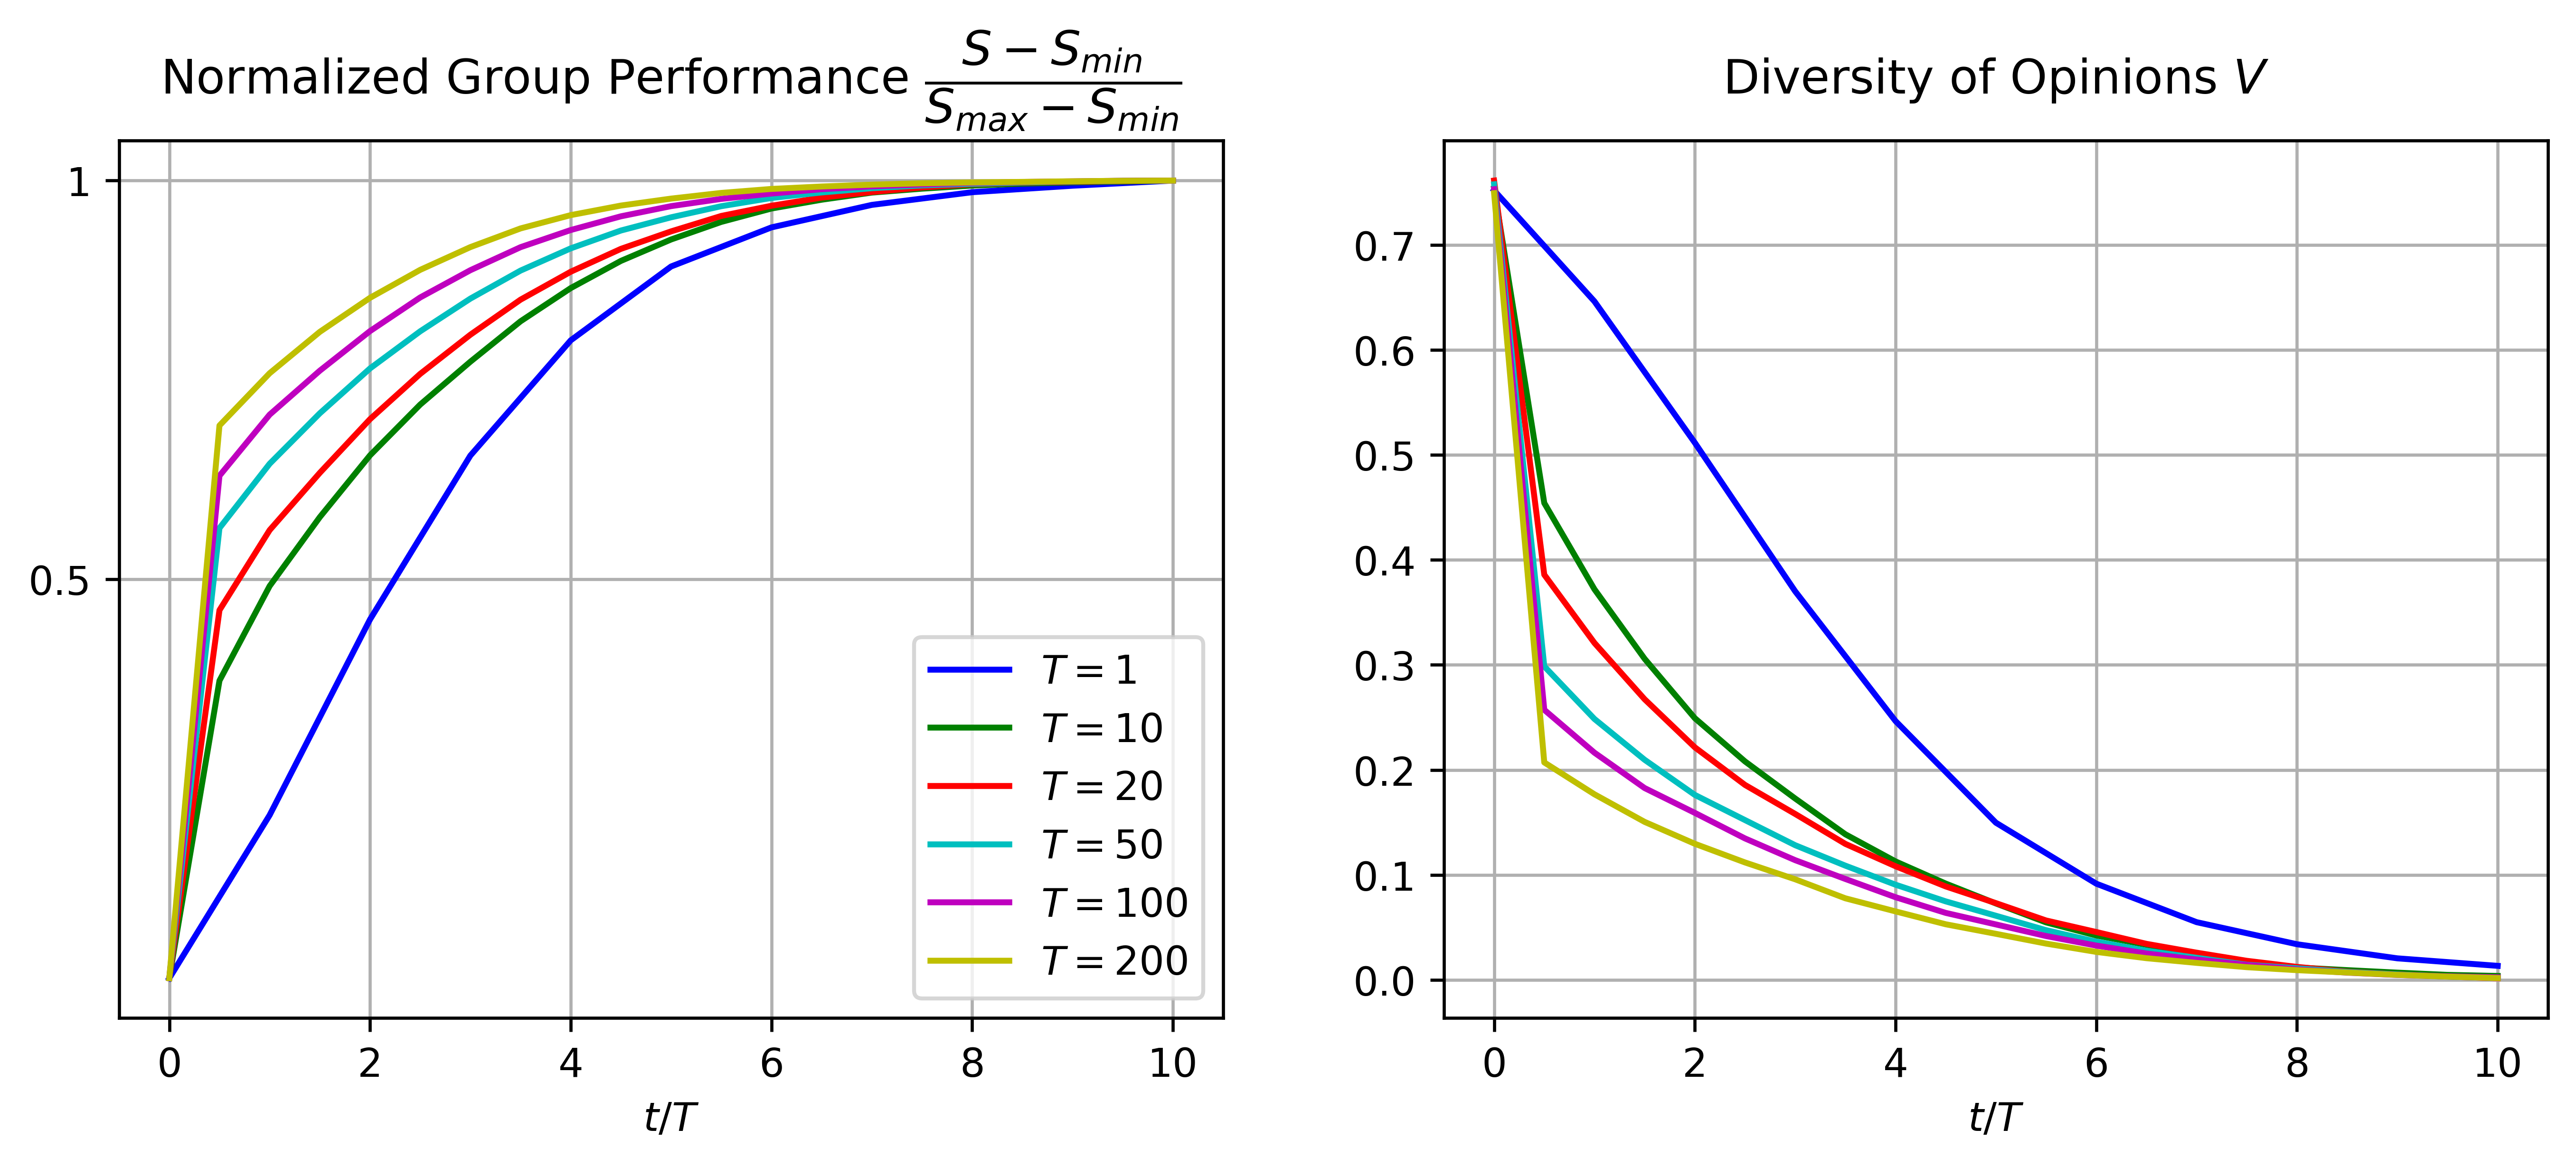

In [184]:
fig,axs = plt.subplots(1,2,figsize=(11,4), dpi=600)
t0 = np.linspace(0,10,11)
t = np.linspace(0,10,21)

# main_fig 2
axs[0].set_title(r'Normalized Group Performance $\dfrac{S-S_{min}}{S_{max}-S_{min}}$', pad=12)
axs[0].plot(t0, S_matrix[0], 'b', label=r'$T=1$')
axs[0].plot(t, S_matrix[1], 'g', label=r'$T=10$')
axs[0].plot(t, S_matrix[2], 'r', label=r'$T=20$')
axs[0].plot(t, S_matrix[3], 'c', label=r'$T=50$')
axs[0].plot(t, S_matrix[4], 'm', label=r'$T=100$')
axs[0].plot(t, S_matrix[5], 'y', label=r'$T=200$')
axs[0].set_xlim([-0.5,10.5])
axs[0].set_yticks([0.5, 1], labels=[0.5,1])
axs[0].set_xlabel(r"$t/T$")
axs[0].legend()
axs[0].grid()

# main_fig 2
axs[1].set_title(r'Diversity of Opinions $V$', pad=12)
axs[1].plot(t0, V_matrix[0], 'b', label=r'$T=1$')
axs[1].plot(t, V_matrix[1], 'g', label=r'$T=10$')
axs[1].plot(t, V_matrix[2], 'r', label=r'$T=20$')
axs[1].plot(t, V_matrix[3], 'c', label=r'$T=50$')
axs[1].plot(t, V_matrix[4], 'm', label=r'$T=100$')
axs[1].plot(t, V_matrix[5], 'y', label=r'$T=200$')

axs[1].set_xlim([-0.5,10.5])
axs[1].set_xlabel(r"$t/T$")
axs[1].grid()